In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import logging
from pathlib import Path
import matplotlib
import numpy as np
import pylab as plt

logging.basicConfig(level=logging.INFO)

from common import FIGURE_PROPS as props

from data_prediction import DataPredictionPlots

#parent_directory = '/home/zisis/Projects/ARCHNGV_GERRIT/Circuits/test_circuit/test2'
parent_directory = '/home/eleftherios/Projects/BBP/ASTRO_SYNTHESIS/Data/Circuits/exemplar_1'

figure_directory = Path('./figures/data_prediction')
data_directory = Path('./data/data_prediction')

plots = DataPredictionPlots(parent_directory + '/build/ngv_config.json', figure_directory)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create or load segment indices for neurons, astrocytes, vasculature

In [3]:
vasculature_segment_index_path = data_directory / 'vasculature_segment_index.h5'
neuronal_segment_index_path = data_directory / 'neurons_segment_index.h5'
astrocyte_segment_index_path = data_directory / 'astrocytes_segment_index.h5'

neurons_segment_index = plots.prop.neuronal_segment_index(neuronal_segment_index_path)
astrocyte_segment_index = plots.prop.astrocyte_segment_index(astrocyte_segment_index_path)
vasculature_segment_index = plots.prop.vasculature_segment_index(vasculature_segment_index_path)

filepath = data_directory / 'segment_statistics_per_layer.h5'

if filepath.exists():
    statistics = pd.read_hdf(filepath)
else:
    statistics = plots.prop.segment_features_per_layer(neurons_segment_index, astrocyte_segment_index, vasculature_segment_index)
    statistics.to_hdf(filepath, key='df', mode='w')


INFO:circuit_properties:Neurons segment index already exists and will be opened from file.
INFO:circuit_properties:Astrocytes segment index already exists and will be opened from file.
INFO:circuit_properties:Vasculature segment index already exists and will be opened from file.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [4]:
print(statistics)

         entity layer        length          area        volume
0        neuron    L1  1.202913e+08  1.743903e+08  3.177429e+07
1     astrocyte    L1  1.409162e+06  0.000000e+00  3.967701e+05
2   vasculature    L1  1.569690e+05  3.153708e+06  7.204913e+06
3        neuron    L2  1.653993e+08  2.198030e+08  4.337797e+07
4     astrocyte    L2  9.671486e+05  0.000000e+00  2.728205e+05
5   vasculature    L2  1.596434e+05  3.050623e+06  5.592306e+06
6        neuron    L3  3.792849e+08  4.405262e+08  8.675985e+07
7     astrocyte    L3  2.418795e+06  0.000000e+00  6.814082e+05
8   vasculature    L3  3.414532e+05  6.479781e+06  1.191048e+07
9        neuron    L4  2.694691e+08  3.357340e+08  7.224513e+07
10    astrocyte    L4  1.267711e+06  0.000000e+00  3.574744e+05
11  vasculature    L4  1.920326e+05  3.185566e+06  5.145816e+06
12       neuron    L5  6.569069e+08  8.113369e+08  1.700987e+08
13    astrocyte    L5  3.458016e+06  0.000000e+00  9.739014e+05
14  vasculature    L5  4.584726e+05  6.8

## Segment Properties per layer

INFO:plots_globals:Figure saved: figures/data_prediction/total_process_length.pdf
INFO:plots_globals:Figure saved: figures/data_prediction/total_process_length.png
INFO:plots_globals:Figure saved: figures/data_prediction/total_process_volume.pdf
INFO:plots_globals:Figure saved: figures/data_prediction/total_process_volume.png


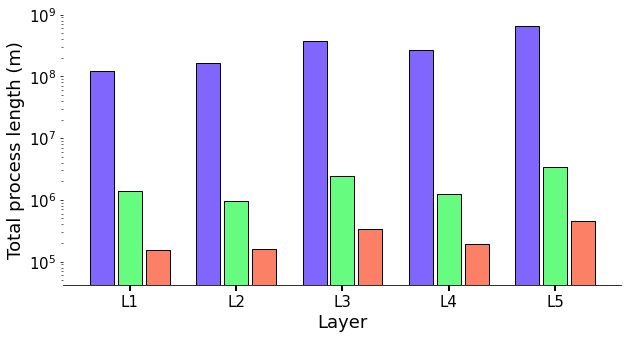

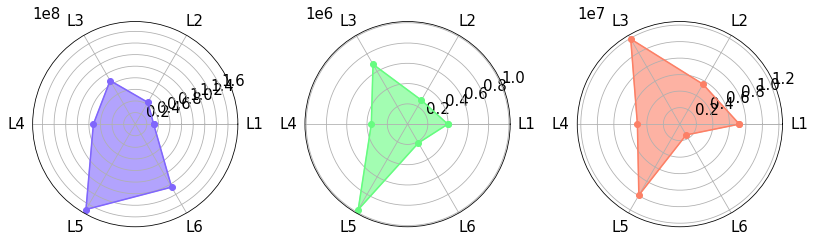

In [19]:

with matplotlib.rc_context(rc=props):

    f, ax = plt.subplots(figsize=(10, 5))
    
    plots.plots.wiring_across_layers(ax, statistics)
    
    plots.save_figure(f, ax, 'total_process_length')

    f = plt.figure(figsize=(15, 5))
    ax1 = f.add_subplot(141, projection='polar')
    ax2 = f.add_subplot(142, projection='polar')
    ax3 = f.add_subplot(143, projection='polar')
    plots.plots.volumes_across_layers_polar([ax1, ax2, ax3], statistics)
    
    plt.tight_layout()
    """
    f, ax = plt.subplots(1, 1, figsize=(8, 4))
    plots.plots.density_per_layer(ax)
    plots.save_figure(f, ax, 'density_per_layer')
    f.suptitle('Density per layer')
    """
    plots.save_figure(f, ax, 'total_process_volume')

INFO:plots_globals:Figure saved: figures/data_prediction/microdomains_avg_volume_per_layer.pdf
INFO:plots_globals:Figure saved: figures/data_prediction/microdomains_avg_volume_per_layer.png


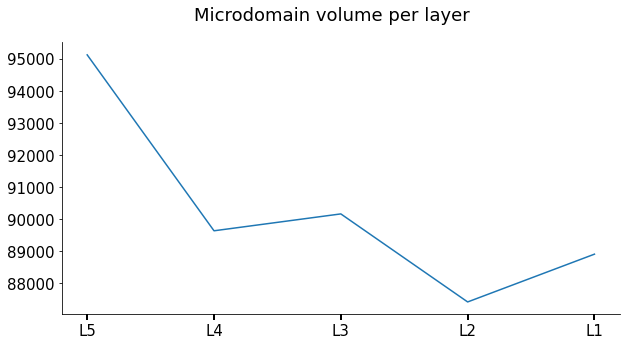

In [18]:
with matplotlib.rc_context(rc=props):

    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    plots.plots.microdomain_volume_per_layer(ax)
    plots.save_figure(f, ax, 'microdomains_avg_volume_per_layer')
    f.suptitle('Microdomain volume per layer')

## Cortical depth spatial density plots

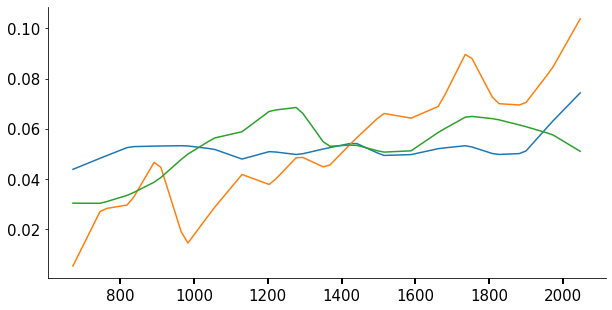

In [21]:

with matplotlib.rc_context(rc=props):
    f, ax = plt.subplots(figsize=(10, 5))
    plots.plots.laminar_density_astrocytic_somata(ax)
    plots.plots.laminar_density_big_vessels(ax)
    plots.plots.laminar_density_capillaries(ax)

    

In [ ]:
plots.plots.neuron_stats_per_domain(neurons_segment_index)

[680873.48429298 793997.58801365 135101.00726148]
[231800.68317032 260908.39942265  42853.12331632]
[396539.96196508 455209.72499371  77581.90576056]
[253552.52558279 304799.68066835  53847.84945829]
[771050.71705818 905518.57024193 156381.48833376]
[396305.96284056 462817.81640577  79139.1463992 ]
[411795.43358994 469042.10058117  78046.71890089]
[797884.53790951 937727.02390146 163281.82386792]
[444032.02959824 495853.273489    79956.89188719]
[419789.51123142 490937.61105156  86671.91663653]
[1046873.06776309 1188608.07232225  199536.67517374]
[527690.03603649 636992.34321499 113334.90829796]
[1481563.33498383 1683635.80479622  283040.97738558]
[713862.80881119 808219.16253185 135682.31315905]
[633846.34346104 721722.98253345 122357.58041108]
[ 944774.01702118 1043569.02288532  171865.88363525]
[549965.27005959 627104.54639149 105750.7059226 ]
[346728.75009298 389471.69310427  65492.71459614]
